# The linear model of SLD data with mental health

In [95]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score

#from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, mean_squared_error


import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/Users/ke/Desktop/mental-health-prediction/data/data.csv')
df.head()

,Unnamed: 0.1,StateAbbr,StateDesc,CountyName,CountyFIPS,TractFIPS,TotalPopulation,TotalPop18plus,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,...,D3APO,D4A,D4C,D4D,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI
0,0,NY,New York,Albany,36001,36001000100,2073,1507,12.2,28.7,...,0.081900,0.990340,0.990502,0.608667,0.052916,0.044596,0.027136,0.053216,0.049366,0.799864
1,1,NY,New York,Albany,36001,36001000201,3125,2314,10.9,24.9,...,0.128381,0.781805,0.781949,0.481601,0.041881,0.041040,0.022724,0.047323,0.042171,0.649692
2,2,NY,New York,Albany,36001,36001000202,2598,1756,10.8,26.7,...,0.043570,0.396692,0.396177,0.243470,0.020306,0.017547,0.009811,0.018994,0.018944,0.306940
3,3,NY,New York,Albany,36001,36001000301,3190,2189,11.1,26.6,...,0.105913,0.997369,0.990393,0.608603,0.046016,0.040432,0.016988,0.039075,0.042929,0.695568
4,4,NY,New York,Albany,36001,36001000302,3496,2956,6.3,22.2,...,0.010392,0.000000,0.000000,0.000000,0.001049,0.001796,0.000000,0.000000,0.081016,0.160011


In [6]:
df.drop(['Unnamed: 0.1', 'StateAbbr', 'StateDesc', 'CountyFIPS', 'Geolocation', 'FUNCSTAT', 'MTFCC', 'GEOIDFQ', 'BLKGRPCE_y'], axis = 1, inplace = True)
df.dropna(axis = 0)

,CountyName,TractFIPS,TotalPopulation,TotalPop18plus,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,...,D3APO,D4A,D4C,D4D,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI
0,Albany,36001000100,2073,1507,12.2,28.7,15.5,5.2,13.9,6.9,...,0.081900,0.990340,0.990502,0.608667,0.052916,0.044596,0.027136,0.053216,0.049366,0.799864
5,Albany,36001000401,2216,2065,4.8,40.6,12.6,15.9,10.1,13.0,...,0.039955,0.992566,0.990417,0.608562,0.044544,0.037201,0.014688,0.035874,0.041556,0.673325
6,Albany,36001000403,4418,3846,5.5,24.6,20.1,7.7,10.6,5.9,...,0.079227,0.992155,0.990601,0.608746,0.059032,0.050245,0.026872,0.053609,0.055072,0.892322
8,Albany,36001000501,3440,2664,11.6,28.6,15.6,5.7,12.9,7.9,...,0.079462,0.991771,0.990631,0.610496,0.047783,0.038677,0.029839,0.061080,0.044577,0.722279
9,Albany,36001000502,2841,2575,8.0,14.4,21.9,3.3,12.0,3.5,...,0.144490,0.989677,0.990714,0.609897,0.052684,0.041665,0.029286,0.056412,0.049150,0.796359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5278,Wyoming,36121970900,1972,1588,5.1,28.7,19.7,9.5,10.5,6.7,...,0.015065,0.000000,0.000000,0.000000,0.001019,0.001802,0.000000,0.000000,0.000000,0.000000
5279,Wyoming,36121971000,4187,3282,5.4,30.1,18.9,9.5,10.9,7.4,...,0.014067,0.000000,0.000000,0.000000,0.001724,0.002681,0.000000,0.000000,0.000000,0.000000
5280,Wyoming,36121971100,2482,1918,6.8,32.6,17.8,9.9,11.3,8.7,...,0.009324,0.000000,0.000000,0.000000,0.000776,0.001676,0.000000,0.000000,0.000000,0.000000
5283,Yates,36123150200,5791,4310,7.7,31.2,17.6,9.9,11.3,8.6,...,0.013457,0.000000,0.000000,0.000000,0.002393,0.003360,0.000000,0.000000,0.001084,0.023020


## comment: I only choose SLD data as featured numerical variables

In [53]:
# I only choose SLD data as featured numerical variables
selected_variables = [
    'MHLTH_CrudePrev','P_WrkAge', 'Pct_AO1', 'Pct_AO2p', 'R_HiWageWk', 
    'D1A', 'D2A_EPHHM', 'D2C_TRIPEQ', 
    'D2R_JOBPOP', 'D2C_WREMLX', 'D3A', 'D3AMM', 'D3APO',  
    'D4A', 'D4C', 'D4D', 'D5AR', 'D5BE', 'D5CR', 'D5CRI'
]

numerical_columns = selected_variables
categorical_columns = df.select_dtypes(include=['object']).columns

In [55]:
df[numerical_columns]

,MHLTH_CrudePrev,P_WrkAge,Pct_AO1,Pct_AO2p,R_HiWageWk,D1A,D2A_EPHHM,D2C_TRIPEQ,D2R_JOBPOP,D2C_WREMLX,D3A,D3AMM,D3APO,D4A,D4C,D4D,D5AR,D5BE,D5CR,D5CRI
0,3.086487,0.561000,0.521858,0.213115,0.031163,0.001553,0.785584,0.519190,0.811374,0.530058,0.139475,0.007138,0.081900,0.990340,0.990502,0.608667,0.052916,0.053216,0.049366,0.799864
1,2.954910,0.489053,0.352009,0.419786,0.033040,0.017527,0.266459,0.080750,0.089197,0.016396,0.183272,0.219003,0.128381,0.781805,0.781949,0.481601,0.041881,0.047323,0.042171,0.649692
2,3.100092,0.563200,0.316883,0.644087,0.022093,0.000733,0.760111,0.723029,0.485566,0.557473,0.039075,0.005835,0.043570,0.396692,0.396177,0.243470,0.020306,0.018994,0.018944,0.306940
3,3.054001,0.571909,0.211501,0.782514,0.066038,0.002070,0.396372,0.123313,0.188978,0.113597,0.094357,0.027665,0.105913,0.997369,0.990393,0.608603,0.046016,0.039075,0.042929,0.695568
4,2.809403,0.589348,0.323633,0.665056,0.028032,0.000031,0.247093,0.001572,0.068504,0.000015,0.010941,0.001181,0.010392,0.000000,0.000000,0.000000,0.001049,0.000000,0.081016,0.160011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,2.839078,0.554588,0.181592,0.587023,0.047311,0.000208,0.382142,0.053617,0.128267,0.070462,0.019186,0.003150,0.017263,0.000000,0.000000,0.000000,0.004091,0.000000,0.005022,0.074748
5285,2.778819,0.554075,0.178578,0.587818,0.046631,0.000183,0.377288,0.045959,0.122951,0.061023,0.018669,0.002830,0.016719,0.000000,0.000000,0.000000,0.003849,0.000000,0.004459,0.067358
5286,2.833213,0.570000,0.094077,0.839721,0.025145,0.000072,0.301642,0.000185,0.093023,0.001979,0.020934,0.005711,0.022084,0.000000,0.000000,0.000000,0.001502,0.000000,0.000680,0.014446
5287,2.844909,0.552025,0.166522,0.591001,0.043913,0.000085,0.357872,0.015327,0.101688,0.023267,0.016605,0.001549,0.014544,0.000000,0.000000,0.000000,0.002878,0.000000,0.002209,0.037800


In [10]:
df[categorical_columns]

,CountyName,NAMELSAD
0,Albany,Block Group 1
1,Albany,Block Group 2
2,Albany,Block Group 2
3,Albany,Block Group 1
4,Albany,Block Group 1
...,...,...
5284,Yates,Block Group 3
5285,Yates,Block Group 1
5286,Yates,Block Group 1
5287,Yates,Block Group 1


In [57]:
final_df = df[np.hstack(df[numerical_columns]+df[categorical_columns])]
final_df.dropna(inplace = True)

/var/folders/5_/zm1h8cps26300lbtjkj23d840000gn/T/ipykernel_23197/4118733649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace = True)


In [59]:
y = final_df['MHLTH_CrudePrev']
X = final_df.drop('MHLTH_CrudePrev', axis = 1)

In [61]:
numerical_columns = X.select_dtypes(include=['number']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

In [63]:
numerical_columns_loc = [X.columns.get_loc(i) for i in numerical_columns]

categorical_columns_loc = [X.columns.get_loc(i) for i in categorical_columns]

In [65]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2)

In [67]:

preprocessor = make_column_transformer(
    (StandardScaler(), numerical_columns_loc),  
    (OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), categorical_columns_loc),  
    remainder='passthrough'  
)

linear_reg_pipe = make_pipeline(
    preprocessor,
    LinearRegression()
    
)


ridge_pipe = make_pipeline(
    preprocessor,
    Ridge(alpha=1.0) 
)


lasso_pipe = make_pipeline(
    preprocessor,
    Lasso(alpha=1.0)  
)



In [97]:

linear_scores = cross_val_score(lasso_pipe, X_dev, y_dev, cv=5)
print("Linear Regression Cross-Validation Scores:", linear_scores)
print("Mean Linear Regression CV Score:", np.mean(linear_scores))

Linear Regression Cross-Validation Scores: [-2.71142530e-03 -5.80493796e-04 -4.05563397e-04 -2.33378742e-03
 -4.56121052e-08]
Mean Linear Regression CV Score: -0.001206263105073191


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [101]:
linear_mse = cross_val_score(
    linear_reg_pipe, X_dev, y_dev, cv=5, scoring=make_scorer(mean_squared_error)
)
print("linear Regression MSE Scores:", linear_mse)
print("Mean linear Regression MSE Score:", np.mean(linear_mse))

linear Regression MSE Scores: [0.02476702 0.02399709 0.02254534 0.02382035 0.02561799]
Mean linear Regression MSE Score: 0.02414955688307195


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [103]:
ridge_scores = cross_val_score(ridge_pipe, X_dev, y_dev, cv=5)
print("Ridge Regression Cross-Validation Scores:", ridge_scores)
print("Mean Ridge Regression CV Score:", np.mean(ridge_scores))

Ridge Regression Cross-Validation Scores: [0.35396278 0.36316536 0.38126174 0.35418231 0.29529355]
Mean Ridge Regression CV Score: 0.34957314859392274


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [105]:
ridge_mse = cross_val_score(
    ridge_pipe, X_dev, y_dev, cv=5, scoring=make_scorer(mean_squared_error)
)
print("Ridge Regression MSE Scores:", ridge_mse)
print("Mean Ridge Regression MSE Score:", np.mean(ridge_mse))


Ridge Regression MSE Scores: [0.02465384 0.02398721 0.02245545 0.02393905 0.02555757]
Mean Ridge Regression MSE Score: 0.024118622499273067


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [79]:
lasso_scores = cross_val_score(lasso_pipe, X_dev, y_dev, cv=5)
print("Lasso Regression Cross-Validation Scores:", lasso_scores)
print("Mean Lasso Regression CV Score:", np.mean(lasso_scores))

Lasso Regression Cross-Validation Scores: [-2.71142530e-03 -5.80493796e-04 -4.05563397e-04 -2.33378742e-03
 -4.56121052e-08]
Mean Lasso Regression CV Score: -0.001206263105073191


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [108]:
lasso_mse = cross_val_score(
    lasso_pipe, X_dev, y_dev, cv=5, scoring=make_scorer(mean_squared_error)
)
print("Ridge Regression MSE Scores:", lasso_mse)
print("Mean Ridge Regression MSE Score:", np.mean(lasso_mse))

Ridge Regression MSE Scores: [0.03826511 0.03768818 0.03630705 0.03715431 0.03626697]
Mean Ridge Regression MSE Score: 0.03713632334066305


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


##  comment: from these scores, the R square is 0.349 for Ridge model, which is the highest, and the MSE for ridge model is 0.024118, which is the lowest, so we choose Ridge model to analysis SLD data with mental health.

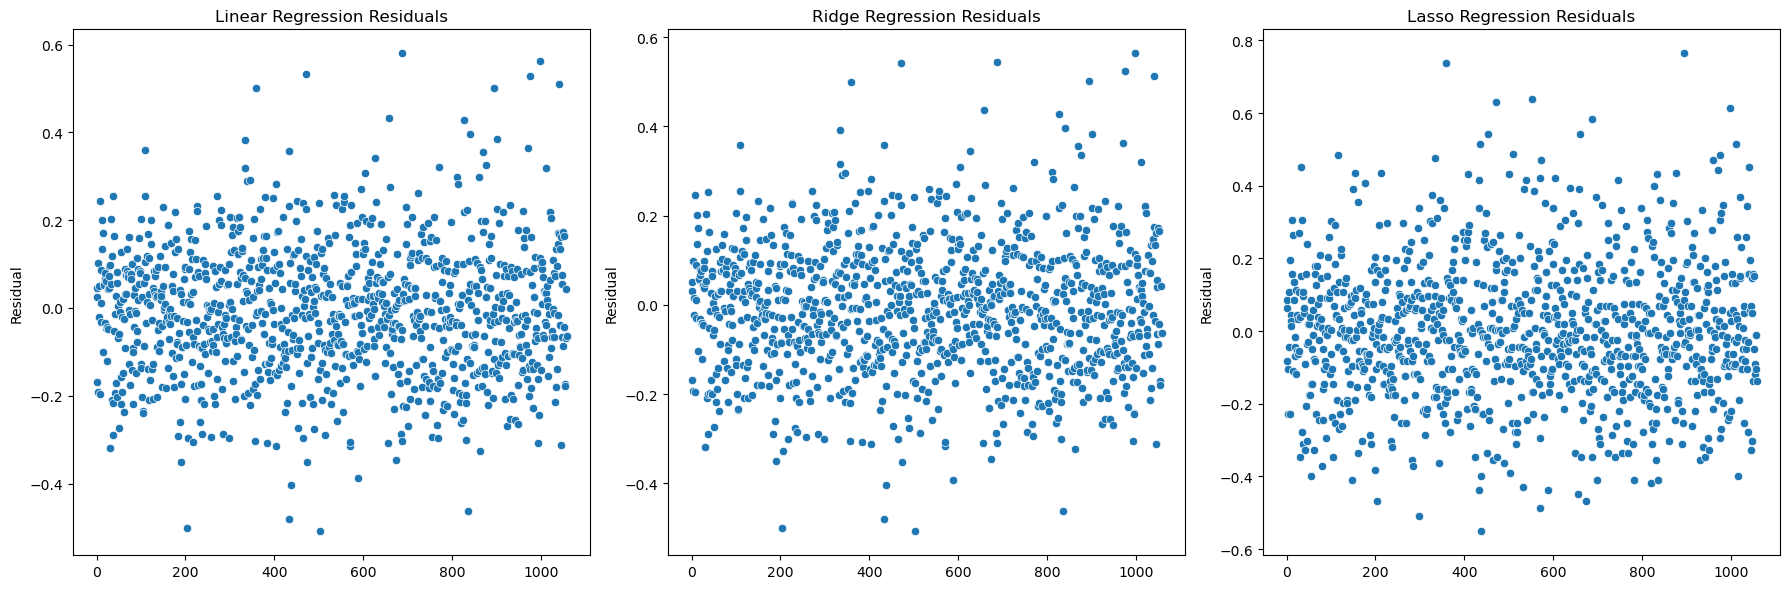

In [81]:
linear_reg_pipe.fit(X_dev, y_dev)
ridge_pipe.fit(X_dev, y_dev)
lasso_pipe.fit(X_dev, y_dev)

lr_pred = linear_reg_pipe.predict(X_test)
ridge_pred = ridge_pipe.predict(X_test)
lasso_pred = lasso_pipe.predict(X_test)

lr_residuals = y_test - lr_pred
ridge_residuals = y_test - ridge_pred
lasso_residuals = y_test - lasso_pred

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x=np.arange(len(lr_residuals)), y=lr_residuals, ax=ax[0])
ax[0].set_ylabel("Residual")
ax[0].set_title("Linear Regression Residuals")

sns.scatterplot(x=np.arange(len(ridge_residuals)), y=ridge_residuals, ax=ax[1])
ax[1].set_ylabel("Residual")
ax[1].set_title("Ridge Regression Residuals")

sns.scatterplot(x=np.arange(len(lasso_residuals)), y=lasso_residuals, ax=ax[2])
ax[2].set_ylabel("Residual")
ax[2].set_title("Lasso Regression Residuals")

plt.tight_layout()
plt.show()



1. **Linear Regression Residuals**: The residuals are evenly scattered around zero, indicating a good fit with no obvious bias. However, the spread is somewhat wide, suggesting the model may not capture all complexities.

2. **Ridge Regression Residuals**: The residuals are similarly scattered but with a tighter spread, indicating better control over overfitting due to regularization. This suggests it generalizes slightly better than Linear Regression.

3. **Lasso Regression Residuals**: The residuals have a wider spread compared to Ridge, indicating potential underfitting due to Lasso's aggressive feature selection. This suggests it may be overlooking some important patterns in the data.

# Overall, ridge regression performs the best.


In [85]:
ridge_coefficients = ridge_pipe.named_steps['ridge'].coef_
print("Ridge Regression Coefficients:", ridge_coefficients)

Ridge Regression Coefficients: [-0.01198469 -0.00136013 -0.00553053  0.00831654 -0.01747767 -0.01137801
  0.0236483   0.01969343  0.01386412  0.14375673 -0.14580217 -0.04545297
 -0.02214136 -0.01199356  0.02183389  0.01495821 -0.04133446 -0.10324155
 -0.04019669  0.06102579  0.02905773  0.07311765  0.11608273  0.0640892
  0.09118631  0.00209592  0.07142449  0.06938444 -0.03103588  0.11427014
  0.01064758 -0.01147553  0.02697964  0.01636735  0.13203916  0.05654568
  0.06244881 -0.00693023 -0.06882593  0.04930685  0.06959968 -0.10024783
  0.07786277  0.06096842  0.09918134 -0.02988919  0.10261347 -0.10335336
 -0.13287059  0.04514886  0.01151268  0.01665316 -0.01814889  0.05062278
  0.12120145  0.17292388  0.09764342 -0.0283645  -0.06791449  0.05397732
 -0.00643342  0.05072914  0.02399067  0.03680731  0.02463463  0.06798512
  0.07859758  0.13360873  0.07191618  0.0306127   0.01600903  0.04694803
  0.10213081  0.01767722  0.00836865  0.0691193   0.08916869 -0.11709192
  0.04004313  0.05900

In [87]:
feature_names = preprocessor.get_feature_names_out()
ridge_coeff_dict = dict(zip(feature_names, ridge_coefficients))
print("Ridge Regression Coefficients with Feature Names:")
print(ridge_coeff_dict)

Ridge Regression Coefficients with Feature Names:
{'standardscaler__D1A': -0.011984689387999809, 'standardscaler__D2A_EPHHM': -0.0013601332311620933, 'standardscaler__D2C_TRIPEQ': -0.005530525423985454, 'standardscaler__D2C_WREMLX': 0.008316541885835716, 'standardscaler__D2R_JOBPOP': -0.017477665289442355, 'standardscaler__D3A': -0.01137800597986756, 'standardscaler__D3AMM': 0.02364830263149926, 'standardscaler__D3APO': 0.019693432724790592, 'standardscaler__D4A': 0.013864121564660523, 'standardscaler__D4C': 0.1437567304386546, 'standardscaler__D4D': -0.14580216883986308, 'standardscaler__D5AR': -0.04545297356796125, 'standardscaler__D5BE': -0.022141364242948394, 'standardscaler__D5CR': -0.011993560339926521, 'standardscaler__D5CRI': 0.021833890704286023, 'standardscaler__P_WrkAge': 0.014958212306630877, 'standardscaler__Pct_AO1': -0.041334456098694766, 'standardscaler__Pct_AO2p': -0.10324154946209005, 'standardscaler__R_HiWageWk': -0.040196685159916236, 'onehotencoder__CountyName_Alle

In [89]:
# List of variables to display
selected_variables = [
    'standardscaler__P_WrkAge', 'standardscaler__Pct_AO1', 'standardscaler__Pct_AO2p', 'standardscaler__R_HiWageWk', 
    'standardscaler__D1A', 'standardscaler__D2A_EPHHM', 'standardscaler__D2C_TRIPEQ', 
    'standardscaler__D2R_JOBPOP', 'standardscaler__D2C_WREMLX', 'standardscaler__D3A', 'standardscaler__D3AMM', 'standardscaler__D3APO',  
    'standardscaler__D4A', 'standardscaler__D4C', 'standardscaler__D4D', 'standardscaler__D5AR', 'standardscaler__D5BE', 'standardscaler__D5CR', 'standardscaler__D5CRI'
]

# Filter coefficients for selected variables
selected_ridge_coeff_dict = {var: ridge_coeff_dict[var] for var in selected_variables if var in ridge_coeff_dict}

# Print selected coefficients
print("Selected Ridge Coefficients:")
print(selected_ridge_coeff_dict)




Selected Ridge Coefficients:
{'standardscaler__P_WrkAge': 0.014958212306630877, 'standardscaler__Pct_AO1': -0.041334456098694766, 'standardscaler__Pct_AO2p': -0.10324154946209005, 'standardscaler__R_HiWageWk': -0.040196685159916236, 'standardscaler__D1A': -0.011984689387999809, 'standardscaler__D2A_EPHHM': -0.0013601332311620933, 'standardscaler__D2C_TRIPEQ': -0.005530525423985454, 'standardscaler__D2R_JOBPOP': -0.017477665289442355, 'standardscaler__D2C_WREMLX': 0.008316541885835716, 'standardscaler__D3A': -0.01137800597986756, 'standardscaler__D3AMM': 0.02364830263149926, 'standardscaler__D3APO': 0.019693432724790592, 'standardscaler__D4A': 0.013864121564660523, 'standardscaler__D4C': 0.1437567304386546, 'standardscaler__D4D': -0.14580216883986308, 'standardscaler__D5AR': -0.04545297356796125, 'standardscaler__D5BE': -0.022141364242948394, 'standardscaler__D5CR': -0.011993560339926521, 'standardscaler__D5CRI': 0.021833890704286023}


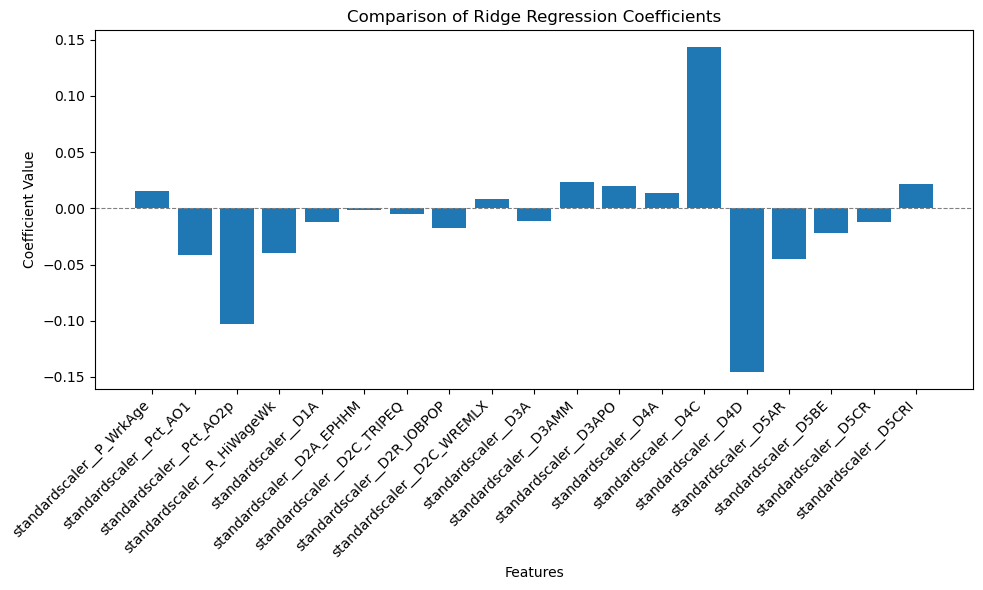

In [110]:
features = list(selected_ridge_coeff_dict.keys())
coefficients = list(selected_ridge_coeff_dict.values())

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(features, coefficients)
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Ridge Regression Coefficients')
plt.tight_layout()  # Adjust layout for readability
plt.show()

# Comment: we can learn that pct_Ao1, Pct_AO2p, R_Hiwagewk, D4D,D5AR have strong negative coefficient to MHLTH_CrudePrev (i.e.stands for the crude prevalence of frequent mental distress among adults.), which means these variables is reducing the mental disease. P_WrkAge, D3AMM, D3APO, D4A, D4C, D5CRI have positive coefficients to MHLTH_CrudePrev, thus these variables will increase the risk of mental distress.To clearify the variable names : 

# Pct_AO1 ,Percent of one-car households in CBG, 2018 

# Pct_AO2p ,Percent of two-plus-car households in CBG, 2018 

# R_HiWageWk, Count of workers earning $3333/month or more (home location), 2017

# D4d, Aggregate frequency of transit service [D4c] per square mile 
# D4c, Aggregate frequency of transit service within 0.25 miles of CBG boundary per hour during evening peak period, 2020

# D5ar, Jobs within 45 minutes auto travel time, time- decay (network travel time) weighted, 2020

# These are negative variables.

# ‘P_WrkAge’, Percent of population that is working aged 18 to 64 years, 

# D3amm, Network density in terms of facility miles of multi-modal links per square mile 

# D3apo, Network density in terms of facility miles of pedestrian- oriented links per square mile

# D4a, Distance from the population-weighted centroid to nearest transit stop (meters) ,2020

# D4c, Aggregate frequency of transit service within 0.25 miles of CBG boundary per hour during evening peak period, 2020

# D5cr, Proportional Accessibility to Regional Destinations - Auto: Employment accessibility expressed as a ratio of total CBSA accessibility

# D5cri, Regional Centrality Index – Auto: CBG [D5cr] score relative to max CBSA [D5cr] score 

# These are the positive variables.

# In conclusion, The results show that indicators representing household wealth levels, such as higher income, owning more cars, and living closer to the workplace, have a negative impact on mental distress, meaning they are associated with better mental health. However, indicators reflecting living in more central, denser, and more developed urban areas have a positive impact on mental distress, suggesting that the sense of urban density negatively affects mental health.

